# Homework 6, Part Two: A dataset about dogs.

Data from [a FOIL request to New York City](https://www.muckrock.com/foi/new-york-city-17/pet-licensing-data-for-new-york-city-23826/)

## Do your importing and your setup

In [1]:
import pandas as pd
import numpy as np

pd.set_option("display.max_rows", 30000)

/Users/paromasoni/.pyenv/versions/3.8.2/lib/python3.8/site-packages/pandas/compat/__init__.py:120: UserWarning: Could not import the lzma module. Your installed Python is incomplete. Attempting to use lzma compression will result in a RuntimeError.
  warnings.warn(msg)


## Read in the file `NYC_Dog_Licenses_Current_as_of_4-28-2016.xlsx` and look at the first five rows

In [2]:
df = pd.read_excel ("NYC_Dog_Licenses_Current_as_of_4-28-2016.xlsx", na_values = ['Unknown', 'UNKNOWN', 'unknown'])
df.head(5)

,Owner Zip Code,Animal Name,Animal Gender,Primary Breed,Secondary Breed,Animal Dominant Color,Animal Secondary Color,Animal Third Color,Animal Birth,Spayed or Neut,Guard or Trained,Vaccinated,Application Date,License Issued Date,License Expired Date
0,10024,BLUE MACK,M,NaN,AIREDALE TERR,BROWN,BLACK,NaN,2007-11-01,Yes,No,Yes,2012-09-19 16:01:19.647,2015-09-19,2016-09-19
1,10461,Indie Zephir,M,Rottweiler,NaN,BLACK,TAN,NaN,2013-04-01,No,No,Yes,2013-09-20 11:41:36.647,2014-09-20,2018-09-20
2,10013,Bilal,M,Australian Cattledog,NaN,Rust,NaN,NaN,2014-09-01,Yes,NaN,No,2014-09-12 13:13:36.713,2014-09-12,2019-09-12
3,10025,Buddy,M,NaN,Cockapoo,BLOND,WHITE,NaN,2008-04-01,Yes,No,Yes,2014-09-12 15:26:51.417,2014-09-12,2017-10-20
4,10013,Ali,M,Basenji,NaN,Black,NaN,NaN,2014-01-01,No,NaN,No,2014-09-12 15:43:17.707,2014-09-12,2019-09-12


## How many rows do you have in the data? What are the column types?

If there are more than 30,000 rows in your dataset, go back and only read in the first 30,000.

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81937 entries, 0 to 81936
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   Owner Zip Code          81937 non-null  int64         
 1   Animal Name             80281 non-null  object        
 2   Animal Gender           81937 non-null  object        
 3   Primary Breed           69043 non-null  object        
 4   Secondary Breed         10487 non-null  object        
 5   Animal Dominant Color   81608 non-null  object        
 6   Animal Secondary Color  56919 non-null  object        
 7   Animal Third Color      17641 non-null  object        
 8   Animal Birth            81937 non-null  datetime64[ns]
 9   Spayed or Neut          81937 non-null  object        
 10  Guard or Trained        49576 non-null  object        
 11  Vaccinated              81937 non-null  object        
 12  Application Date        81937 non-null  dateti

In [4]:
df.columns

Index(['Owner Zip Code', 'Animal Name', 'Animal Gender', 'Primary Breed',
       'Secondary Breed', 'Animal Dominant Color', 'Animal Secondary Color',
       'Animal Third Color', 'Animal Birth', 'Spayed or Neut',
       'Guard or Trained', 'Vaccinated', 'Application Date',
       'License Issued Date', 'License Expired Date'],
      dtype='object')

## Describe the dataset in words. What is each row? List two column titles along with what each of those columns means.

For example: “Each row is an animal in the zoo. `is_reptile` is whether the animal is a reptile or not”

----

The dataset contains all dogs licensed in New York, each with a row of its own. The column "spayed or neut" asks if the dogs are either spayed (if female) or neutered (if male). Similarly the column "vaccinated" indicates if they have been vaccinated or not. 

----

# Your thoughts

Think of four questions you could ask this dataset. **Don't ask them**, just write them down in the cell below. Feel free to use either Markdown or Python comments.

----

1. How many dogs in NYC are not vaccinated?
2. What is the most common breed of dog in the city?
3. What zip code has the most dogs?
4. What zip code has the highest and lowest percentages of dogs that are not spayed/neutered?

----

# Looking at some dogs

## What are the most popular (primary) breeds of dogs? Graph the top 10.

In [5]:
df['Primary Breed'].value_counts().head(10)

#I ammended my read to make 'unknown' into na values so they won't show here anymore

Yorkshire Terrier                       5133
Shih Tzu                                4727
Chihuahua                               3924
Maltese                                 2965
Labrador Retriever                      2872
American Pit Bull Terrier/Pit Bull      2153
American Pit Bull Mix / Pit Bull Mix    2029
Labrador Retriever Crossbreed           1864
Beagle                                  1438
Pomeranian                              1422
Name: Primary Breed, dtype: int64

## "Unknown" is a terrible breed! Graph the top 10 breeds that are NOT Unknown

<AxesSubplot:>

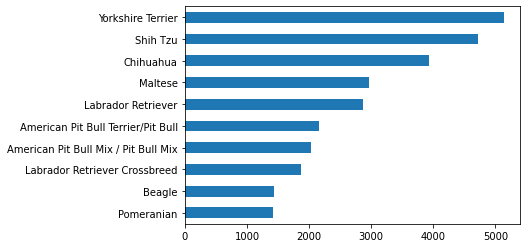

In [6]:
df['Primary Breed'].value_counts().head(10).sort_values().plot(
kind='barh')

## What are the most popular dog names?

In [7]:
df['Animal Name'].value_counts().head(10)

Bella      527
Max        515
Charlie    403
Lola       387
Rocky      354
Lucy       338
Coco       308
Buddy      300
Lucky      291
Daisy      279
Name: Animal Name, dtype: int64

## Do any dogs have your name? How many dogs are named "Max," and how many are named "Maxwell"?

In [8]:
df['Animal Name'][df['Animal Name'] == 'Paroma'].count()
# What a surprise!

0

In [9]:
df['Animal Name'][df['Animal Name'] == 'Max'].count()

515

In [10]:
df['Animal Name'][df['Animal Name'] == 'Maxwell'].count()

30

## What percentage of dogs are guard dogs?

Check out the documentation for [value counts](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.value_counts.html).

In [11]:
df['Guard or Trained'].value_counts(dropna=False, normalize=True) * 100

No     60.442779
NaN    39.494978
Yes     0.062243
Name: Guard or Trained, dtype: float64

## What are the actual numbers?

In [12]:
df['Guard or Trained'][df['Guard or Trained'] == 'Yes'].count()

51

In [13]:
df['Guard or Trained'][df['Guard or Trained'] == 'No'].count()

49525

## Wait... if you add that up, is it the same as your number of rows? Where are the other dogs???? How can we find them??????

Use your `.head()` to think about it, then you'll do some magic with `.value_counts()`

In [14]:
df['Guard or Trained'].value_counts(dropna=False, normalize=True) * 100

#It worked the first time, I guess you mean without the dropna?

No     60.442779
NaN    39.494978
Yes     0.062243
Name: Guard or Trained, dtype: float64

## Fill in all of those empty "Guard or Trained" columns with "No"

Then check your result with another `.value_counts()`

In [15]:
df['Guard or Trained'] = df['Guard or Trained'].fillna("No")

In [16]:
df['Guard or Trained'].value_counts()

No     81886
Yes       51
Name: Guard or Trained, dtype: int64

## What are the top dog breeds for guard dogs? 

In [17]:
df['Primary Breed'][df['Guard or Trained'] == 'Yes'].value_counts().head(5)

German Shepherd Dog                     4
Chihuahua                               3
American Pit Bull Mix / Pit Bull Mix    3
Rottweiler                              3
Labrador Retriever                      3
Name: Primary Breed, dtype: int64

## Create a new column called "year" that is the dog's year of birth

The `Animal Birth` column is a datetime, so you can get the year out of it with the code `df['Animal Birth'].apply(lambda birth: birth.year)`.

In [18]:
df['Year'] = df['Animal Birth'].apply(lambda birth: birth.year)
df.head()

,Owner Zip Code,Animal Name,Animal Gender,Primary Breed,Secondary Breed,Animal Dominant Color,Animal Secondary Color,Animal Third Color,Animal Birth,Spayed or Neut,Guard or Trained,Vaccinated,Application Date,License Issued Date,License Expired Date,Year
0,10024,BLUE MACK,M,NaN,AIREDALE TERR,BROWN,BLACK,NaN,2007-11-01,Yes,No,Yes,2012-09-19 16:01:19.647,2015-09-19,2016-09-19,2007
1,10461,Indie Zephir,M,Rottweiler,NaN,BLACK,TAN,NaN,2013-04-01,No,No,Yes,2013-09-20 11:41:36.647,2014-09-20,2018-09-20,2013
2,10013,Bilal,M,Australian Cattledog,NaN,Rust,NaN,NaN,2014-09-01,Yes,No,No,2014-09-12 13:13:36.713,2014-09-12,2019-09-12,2014
3,10025,Buddy,M,NaN,Cockapoo,BLOND,WHITE,NaN,2008-04-01,Yes,No,Yes,2014-09-12 15:26:51.417,2014-09-12,2017-10-20,2008
4,10013,Ali,M,Basenji,NaN,Black,NaN,NaN,2014-01-01,No,No,No,2014-09-12 15:43:17.707,2014-09-12,2019-09-12,2014


## Calculate a new column called “age” that shows approximately how old the dog is. How old are dogs on average?

In [19]:
df['Age'] = 2020 - df['Year']
df.head()

,Owner Zip Code,Animal Name,Animal Gender,Primary Breed,Secondary Breed,Animal Dominant Color,Animal Secondary Color,Animal Third Color,Animal Birth,Spayed or Neut,Guard or Trained,Vaccinated,Application Date,License Issued Date,License Expired Date,Year,Age
0,10024,BLUE MACK,M,NaN,AIREDALE TERR,BROWN,BLACK,NaN,2007-11-01,Yes,No,Yes,2012-09-19 16:01:19.647,2015-09-19,2016-09-19,2007,13
1,10461,Indie Zephir,M,Rottweiler,NaN,BLACK,TAN,NaN,2013-04-01,No,No,Yes,2013-09-20 11:41:36.647,2014-09-20,2018-09-20,2013,7
2,10013,Bilal,M,Australian Cattledog,NaN,Rust,NaN,NaN,2014-09-01,Yes,No,No,2014-09-12 13:13:36.713,2014-09-12,2019-09-12,2014,6
3,10025,Buddy,M,NaN,Cockapoo,BLOND,WHITE,NaN,2008-04-01,Yes,No,Yes,2014-09-12 15:26:51.417,2014-09-12,2017-10-20,2008,12
4,10013,Ali,M,Basenji,NaN,Black,NaN,NaN,2014-01-01,No,No,No,2014-09-12 15:43:17.707,2014-09-12,2019-09-12,2014,6


In [20]:
df['Age'].mean()

10.341848005174707

# Joining data together

In [21]:
df2 = pd.read_csv ("zipcodes-neighborhoods.csv")
df2.head()

,neighborhood,zip,borough
0,Central Bronx,10453,Bronx
1,Central Bronx,10457,Bronx
2,Central Bronx,10460,Bronx
3,Bronx Park and Fordham,10458,Bronx
4,Bronx Park and Fordham,10467,Bronx


In [22]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   neighborhood  178 non-null    object
 1   zip           178 non-null    int64 
 2   borough       178 non-null    object
dtypes: int64(1), object(2)
memory usage: 4.3+ KB


## Which neighborhood does each dog live in?

You also have a (terrible) list of NYC neighborhoods in `zipcodes-neighborhoods.csv`. Join these two datasets together, so we know what neighborhood each dog lives in. **Be sure to not read it in as `df`, or else you'll overwrite your dogs dataframe.**

In [23]:
#df2[(df2.zip == 11109)]

In [24]:
merged_full = df.merge(df2, how='left',
        left_on='Owner Zip Code',
        right_on='zip')

#merged_full.zip.isnull().value_counts()
#merged_full[(merged_full.zip.isnull())].sort_values(by='Owner Zip Code')
#merged_full['Owner Zip Code'].isnull().value_counts()

df3 = merged_full.drop(columns=['zip'])
df3
#df3[(df3['neighborhood'].isnull())]

,Owner Zip Code,Animal Name,Animal Gender,Primary Breed,Secondary Breed,Animal Dominant Color,Animal Secondary Color,Animal Third Color,Animal Birth,Spayed or Neut,Guard or Trained,Vaccinated,Application Date,License Issued Date,License Expired Date,Year,Age,neighborhood,borough
0,10024,BLUE MACK,M,NaN,AIREDALE TERR,BROWN,BLACK,NaN,2007-11-01,Yes,No,Yes,2012-09-19 16:01:19.647,2015-09-19,2016-09-19,2007,13,Upper West Side,Manhattan
1,10461,Indie Zephir,M,Rottweiler,NaN,BLACK,TAN,NaN,2013-04-01,No,No,Yes,2013-09-20 11:41:36.647,2014-09-20,2018-09-20,2013,7,Southeast Bronx,Bronx
2,10013,Bilal,M,Australian Cattledog,NaN,Rust,NaN,NaN,2014-09-01,Yes,No,No,2014-09-12 13:13:36.713,2014-09-12,2019-09-12,2014,6,Greenwich Village and Soho,Manhattan
3,10025,Buddy,M,NaN,Cockapoo,BLOND,WHITE,NaN,2008-04-01,Yes,No,Yes,2014-09-12 15:26:51.417,2014-09-12,2017-10-20,2008,12,Upper West Side,Manhattan
4,10013,Ali,M,Basenji,NaN,Black,NaN,NaN,2014-01-01,No,No,No,2014-09-12 15:43:17.707,2014-09-12,2019-09-12,2014,6,Greenwich Village and Soho,Manhattan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
81932,10001,Cheeseburger,M,Pug,NaN,Fawn,NaN,NaN,2013-01-01,Yes,No,Yes,2016-04-28 15:11:18.533,2016-04-28,2017-04-28,2013,7,Chelsea and Clinton,Manhattan
81933,10021,Jack,M,NaN,NaN,Cream,NaN,NaN,2015-07-01,Yes,No,Yes,2016-04-28 15:12:22.150,2016-04-28,2017-04-28,2015,5,Upper East Side,Manhattan
81934,10032,Petunia,F,Lhasa Apso,NaN,GOLD,BLACK,WHITE,2009-11-01,Yes,No,Yes,2016-04-28 15:18:14.240,2016-04-28,2018-02-18,2009,11,Inwood and Washington Heights,Manhattan
81935,10310,Max,M,Cocker Spaniel,NaN,WHITE,BROWN,NaN,2006-04-01,Yes,No,Yes,2016-04-28 15:18:44.520,2016-04-28,2017-06-19,2006,14,Port Richmond,Staten Island


## What is the most popular dog name in all parts of the Bronx? How about Brooklyn? The Upper East Side?

In [25]:
df3['Animal Name'][df3['borough'] == 'Bronx'].value_counts().head(1)

Rocky    60
Name: Animal Name, dtype: int64

In [26]:
df3['Animal Name'][df3['borough'] == 'Brooklyn'].value_counts().head(1)

Max    113
Name: Animal Name, dtype: int64

In [27]:
df3['Animal Name'][df3['neighborhood'] == 'Upper West Side'].value_counts().head(1)

Lola    37
Name: Animal Name, dtype: int64

## What is the most common dog breed in each of the neighborhoods of NYC?

In [28]:
#df3.head()

In [29]:
# df3['Primary Breed'].groupby(df3['neighborhood']).value_counts().groupby(level=0).nlargest(1)

In [30]:
df3['Primary Breed'].groupby(df3['neighborhood']).value_counts().groupby(level=0).nlargest(1).to_frame()

,,,Primary Breed
neighborhood,neighborhood,Primary Breed,
Borough Park,Borough Park,Yorkshire Terrier,115
Bronx Park and Fordham,Bronx Park and Fordham,Yorkshire Terrier,88
Bushwick and Williamsburg,Bushwick and Williamsburg,Yorkshire Terrier,135
Canarsie and Flatlands,Canarsie and Flatlands,Yorkshire Terrier,137
Central Bronx,Central Bronx,Yorkshire Terrier,82
Central Brooklyn,Central Brooklyn,Shih Tzu,113
Central Harlem,Central Harlem,Yorkshire Terrier,132
Central Queens,Central Queens,Yorkshire Terrier,67
Chelsea and Clinton,Chelsea and Clinton,Chihuahua,210


## What breed of dogs are the least likely to be spayed? Male or female?

In [31]:
df3['Spayed or Neut'].groupby(df3['Animal Gender']).value_counts(normalize=True)*100

Animal Gender  Spayed or Neut
               Yes               100.000000
F              Yes                84.512000
               No                 15.488000
M              Yes                77.685746
               No                 22.314254
Name: Spayed or Neut, dtype: float64

## Make a new column called monochrome that is True for any animal that only has black, white or grey as one of its colors. How many animals are monochrome?

In [32]:
#df3[df3['Animal Dominant Color'].isnull()]
df3['Animal Dominant Color'] = df3['Animal Dominant Color'].fillna('None')
df3['Animal Secondary Color'] = df3['Animal Secondary Color'].fillna('None')
df3['Animal Third Color'] = df3['Animal Third Color'].fillna('None')

In [33]:
#df3[df3['Animal Dominant Color'].isin(['Black','White','Grey'])].head()

In [45]:
df.loc[(df['Animal Dominant Color'].str.lower().isin(['black','white','grey'])) | (df['Animal Secondary Color'].str.lower().isin(['black','white','grey'])) | (df['Animal Third Color'].str.lower().isin(['black','white','grey'])),'monochrome'] = True


In [46]:
df.loc[(~df['Animal Dominant Color'].str.lower().isin(['black','white','grey'])) | (~df['Animal Secondary Color'].str.lower().isin(['black','white','grey'])) |(~df['Animal Third Color'].str.lower().isin(['black','white','grey'])),'monochrome'] = False


In [54]:
df['monochrome'].value_counts()

False    81743
True       194
Name: monochrome, dtype: int64

## How many dogs are in each borough? Plot it in a graph.

<AxesSubplot:ylabel='borough'>

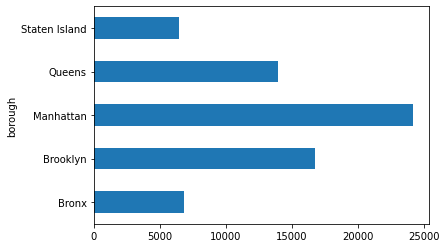

In [55]:
df3['Primary Breed'].groupby(df3['borough']).count().plot(kind='barh')


## Which borough has the highest number of dogs per-capita?

You’ll need to merge in `population_boro.csv`

In [56]:
df4 = pd.read_csv ("boro_population.csv")
df4.head()

,borough,population,area_sqmi
0,Manhattan,1644518,23
1,Bronx,1455444,42
2,Brooklyn,2636735,71
3,Queens,2339150,109
4,Staten Island,474558,59


In [57]:
dogsperborough = df3['Primary Breed'].groupby(df3['borough']).count().to_frame().reset_index()
dogsperborough = dogsperborough.rename(columns={'Primary Breed': 'no of dogs'})
dogsperborough

,borough,no of dogs
0,Bronx,6830
1,Brooklyn,16719
2,Manhattan,24144
3,Queens,13915
4,Staten Island,6486


In [58]:
df5 = dogsperborough.merge(df4, how='left',
        left_on='borough',
        right_on='borough')
df5 = df5.drop(columns=['area_sqmi'])
df5.head()


,borough,no of dogs,population
0,Bronx,6830,1455444
1,Brooklyn,16719,2636735
2,Manhattan,24144,1644518
3,Queens,13915,2339150
4,Staten Island,6486,474558


In [59]:
df5['dogs per capita'] = df5 ['no of dogs'] / df5 ['population'] * 100
df5.max()

borough            Staten Island
no of dogs                 24144
population               2636735
dogs per capita          1.46815
dtype: object

## Make a bar graph of the top 5 breeds in each borough.

How do you groupby and then only take the top X number? You **really** should ask me, because it's kind of crazy.

In [ ]:
#df3.head()

<AxesSubplot:ylabel='borough,borough,Primary Breed'>

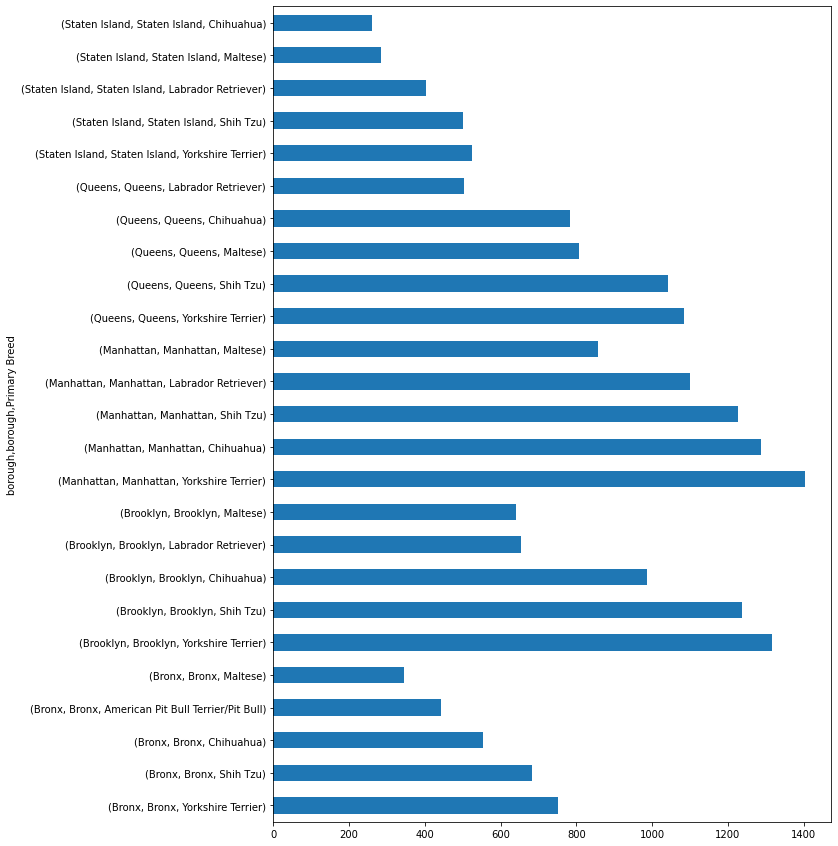

In [60]:
df3['Primary Breed'].groupby(df3['borough']).value_counts().groupby(level=0).nlargest(5).plot(
kind='barh',
figsize=(10,15))

## What percentage of dogs are not guard dogs?

In [61]:
df3['Guard or Trained'].value_counts(normalize=True)*100

No     99.937757
Yes     0.062243
Name: Guard or Trained, dtype: float64